In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Download data from kaggle

https://www.kaggle.com/c/emotion-detection-from-facial-expressions/data

In [0]:
import os

os.environ['KAGGLE_USERNAME'] = 'harveynguyen18'
os.environ['KAGGLE_KEY'] = 'eb90b8fbb6026c4521687abc336113fc'

In [23]:
!kaggle competitions download emotion-detection-from-facial-expressions -p data/

  0% 0.00/3.31M [00:00<?, ?B/s]
100% 3.31M/3.31M [00:00<00:00, 108MB/s]


In [0]:
!tar xf data/kaggle_data.tgz 

In [26]:
!git clone https://github.com/muxspace/facial_expressions.git

Cloning into 'facial_expressions'...
remote: Enumerating objects: 14214, done.
remote: Total 14214 (delta 0), reused 0 (delta 0), pack-reused 14214
Receiving objects: 100% (14214/14214), 239.65 MiB | 44.90 MiB/s, done.
Resolving deltas: 100% (223/223), done.
Checking out files: 100% (13996/13996), done.


In [27]:
!ls


data  facial_expressions  sample_data  test


## Prepare model for training

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy

In [0]:
path_img = './facial_expressions/images'
path_csv = '../data/legend.csv'
bs = 64
size = 224

In [0]:
src = (ImageList.from_csv(path_img, path_csv, cols=1)
      .split_by_rand_pct(0.2)
      .label_from_df(cols=2))

In [0]:
data = (src.transform(get_transforms(), size=size)
       .databunch(bs=bs)
       .normalize(imagenet_stats))

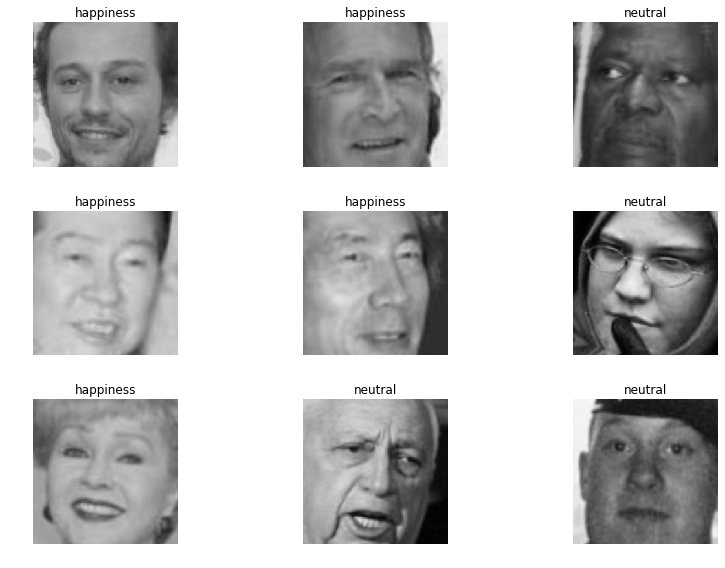

In [42]:
data.show_batch(3, figsize=(12,8))

In [0]:
arch = models.resnet50

In [0]:
learn = cnn_learner(data, arch, metrics=accuracy)

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-03


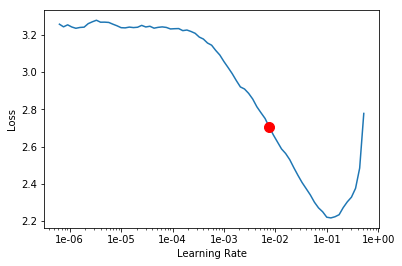

In [47]:
learn.recorder.plot(suggestion=True)

In [50]:
lr = 7.6e-3
learn.fit_one_cycle(3, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.764173,0.685875,0.801680,01:42
1,0.494583,0.429282,0.857560,01:42
2,0.416960,0.389106,0.865595,01:42


In [0]:
learn.save('emotion-resnet50-1')

In [53]:
learn.load('emotion-resnet50-1')

Learner(data=ImageDataBunch;

Train: LabelList (10952 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
surprise,disgust,fear,happiness,neutral
Path: facial_expressions/images;

Valid: LabelList (2738 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
happiness,DISGUST,happiness,happiness,neutral
Path: facial_expressions/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, m

In [54]:
learn.unfreeze()
learn.lr_find()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


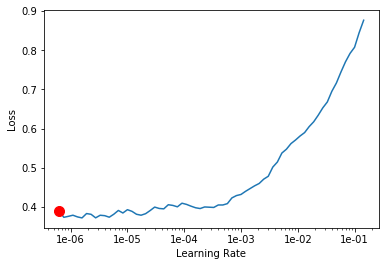

In [55]:
learn.recorder.plot(suggestion=True)

In [57]:
lr = slice(6.1e-7, 1e-4)
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.355458,0.383671,0.867056,02:05
1,0.368201,0.378951,0.868152,02:05
2,0.337498,0.366124,0.874726,02:05
3,0.319554,0.367696,0.875457,02:05
4,0.331398,0.365827,0.874361,02:05


In [58]:
lr = slice(6.1e-7, 1e-3)
learn.fit_one_cycle(5, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.336036,0.383845,0.871439,02:05
1,0.329088,0.388905,0.870343,02:05
2,0.276346,0.385759,0.875822,02:05
3,0.263859,0.380576,0.875822,02:05
4,0.217395,0.384408,0.873996,02:05


In [0]:
learn.save('emotion-resnet50-unfreeze')

In [60]:
from google.colab import drive
drive.mount('./gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./gdrive


In [64]:
!ls facial_expressions/images/models/

emotion-resnet50-1.pth	emotion-resnet50-unfreeze.pth  tmp.pth


In [0]:
!cp facial_expressions/images/models/emotion-resnet50-unfreeze.pth gdrive/My\ Drive/production_model/

In [0]:
learn.export()

In [67]:
ls -la facial_expressions/images/*.pkl

-rw-r--r-- 1 root root 102849962 Jun  2 07:18 facial_expressions/images/emotion-resnet50-unfreeze.pkl


In [0]:
!cp facial_expressions/images/export.pkl gdrive/My\ Drive/production_model/

In [72]:
!ls {learn.path}/*.pkl

facial_expressions/images/emotion-resnet50-unfreeze.pkl
facial_expressions/images/export.pkl


In [0]:
learn = load_learner(learn.path)

In [76]:
import fastai
fastai.__version__

'1.0.52'